In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
tf.__version__

'2.8.0'

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [7]:
drop = ['RowNumber','CustomerId','Surname','Geography','Gender']
df = df.drop(drop, axis = 1)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [11]:
for column in df:
    print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
x = df.drop(['Exited'],axis = 1)
y = df.Exited

In [14]:
from sklearn.model_selection import train_test_split

x_train_feature, x_test_feature, y_train_target, y_test_target = train_test_split(x,y, test_size = 0.25, random_state = 5, stratify = y)

In [15]:
x_train_feature.shape

(7500, 8)

In [16]:
x_test_feature.shape

(2500, 8)

In [17]:
y_train_target.shape

(7500,)

In [18]:
y_test_target.shape

(2500,)

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train_feature, y_train_target, 
                                                    test_size = .2, 
                                                    random_state=12)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(6000, 8)
(1500, 8)
(6000,)
(1500,)


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=0.8)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print(x_train_res.shape)
print(y_train_res.shape)
x_train_res.head()

(8600, 8)
(8600,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,765,34,5,86055.17,2,1,1,104220.50
1,506,40,3,0.00,1,1,1,144345.58
2,591,34,4,150635.30,1,1,1,72274.84
3,707,73,6,66573.17,1,1,1,62768.80
4,513,34,7,60515.13,1,0,0,124571.09


In [21]:
pd.DataFrame(y_train_res).value_counts()

Exited
0         4778
1         3822
dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler

cols_scale = ['Tenure','Age','Balance','CreditScore','EstimatedSalary','NumOfProducts']

mms = MinMaxScaler()
x_train_res[cols_scale] = mms.fit_transform(x_train_res[cols_scale])
x_val[cols_scale] = mms.transform(x_val[cols_scale])
x_test_feature[cols_scale] = mms.transform(x_test_feature[cols_scale])

print(x_train_res.shape)
print(x_val.shape)
print(x_test_feature.shape)
print(y_train_res.shape)
print(y_val.shape)
print(y_test_target.shape)
x_test_feature

(8600, 8)
(1500, 8)
(2500, 8)
(8600,)
(1500,)
(2500,)


<ipython-input-22-f330ef31a76b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[cols_scale] = mms.transform(x_val[cols_scale])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-22-f330ef31a76b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4234,0.418,0.342857,0.7,0.000000,0.333333,1,1,0.950401
7594,0.304,0.214286,0.8,0.000000,0.333333,1,1,0.617517
107,0.870,0.257143,0.2,0.418675,0.000000,0,1,0.184558
8790,0.132,0.242857,0.8,0.000000,0.000000,0,0,0.598523
2123,0.602,0.100000,0.2,0.457973,0.333333,1,0,0.572774
...,...,...,...,...,...,...,...,...
8444,0.884,0.742857,0.3,0.000000,0.333333,1,1,0.861340
8980,0.600,0.242857,0.3,0.696271,0.333333,1,1,0.122044
4774,0.922,0.242857,0.7,0.000000,0.000000,1,1,0.000441
256,0.754,0.228571,1.0,0.000000,0.333333,1,1,0.993416


In [23]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [24]:
#two input layers and one output layer. Activation = 'relue' because we want the input to be values. 

model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (8,), activation = 'relu'),
    keras.layers.Dense(64, input_shape = (8,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
# We only have 0 and 1 as output. so binary_crossentropy
model.compile(optimizer = 'Adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

hist = model.fit(x_train_res, y_train_res, batch_size = 10, epochs = 50)

Epoch 1/50
860/860 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7301
Epoch 2/50
860/860 [==============================] - 1s 974us/step - loss: 0.4789 - accuracy: 0.7631
Epoch 3/50
860/860 [==============================] - 1s 920us/step - loss: 0.4608 - accuracy: 0.7729
Epoch 4/50
860/860 [==============================] - 1s 926us/step - loss: 0.4526 - accuracy: 0.7829
Epoch 5/50
860/860 [==============================] - 1s 921us/step - loss: 0.4471 - accuracy: 0.7867
Epoch 6/50
860/860 [==============================] - 1s 925us/step - loss: 0.4438 - accuracy: 0.7878
Epoch 7/50
860/860 [==============================] - 1s 943us/step - loss: 0.4401 - accuracy: 0.7936
Epoch 8/50
860/860 [==============================] - 1s 933us/step - loss: 0.4386 - accuracy: 0.7931
Epoch 9/50
860/860 [==============================] - 1s 941us/step - loss: 0.4346 - accuracy: 0.7966
Epoch 10/50
860/860 [==============================] - 1s 977us/step - loss: 0.4317 

In [35]:
model.evaluate(x_test_feature,y_test_target)

79/79 [==============================] - 0s 870us/step - loss: 0.4497 - accuracy: 0.7884


[0.4497416019439697, 0.7883999943733215]

In [ ]:
y_predict = model.predict(x_test_feature)

In [37]:
#one way to create y_pred
y_pred = []
for element in y_predict:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
cm = confusion_matrix(y_test_target,y_pred)

Text(69.0, 0.5, 'truth')

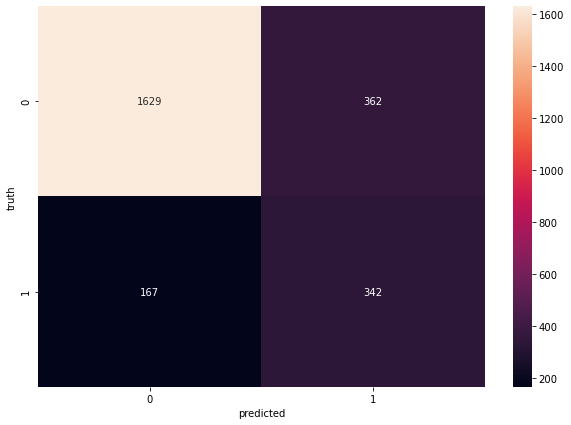

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test_target, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1991
           1       0.49      0.67      0.56       509

    accuracy                           0.79      2500
   macro avg       0.70      0.75      0.71      2500
weighted avg       0.82      0.79      0.80      2500

